In [20]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier



In [21]:
data=pd.read_csv('/content/311_JAN_2023_TO_MAR_2023.csv')

<ipython-input-21-a8099ed71426>:1: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/311_JAN_2023_TO_MAR_2023.csv')


In [22]:
data.shape

(718793, 46)

In [23]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype='object')

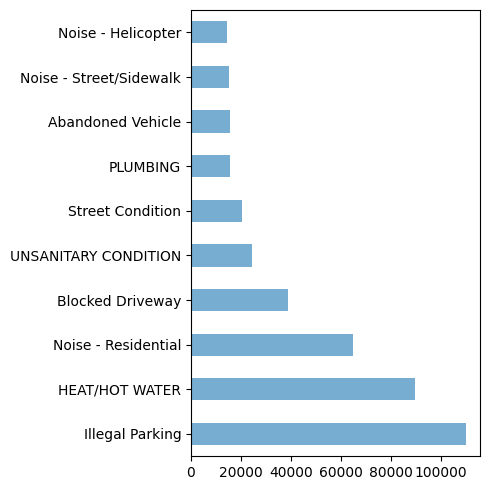

In [24]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
graph1 = data['Complaint Type'].value_counts().nlargest(10).plot(kind='barh',alpha=0.6,figsize=(5,5))
graph1.figure.tight_layout()
plt.show()



In [25]:
categories = data['Status'].unique()

# print the categories
print(categories)

['Closed' 'In Progress' 'Started' 'Open' 'Assigned' 'Unspecified'
 'Pending']


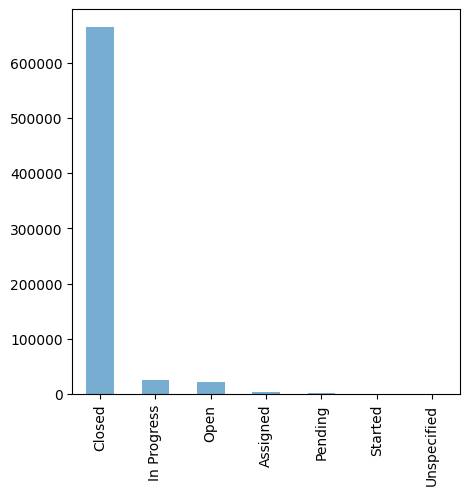

In [26]:
#Have a look at the status of tickets
data['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(5,5))
plt.show()

In [27]:
#To get nan values in the entire dataset
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        48051
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                         12100
Location Type                      96469
Incident Zip                        7865
Incident Address                   34160
Street Name                        34169
Cross Street 1                    250331
Cross Street 2                    250214
Intersection Street 1             277125
Intersection Street 2             276704
Address Type                        3688
City                               30204
Landmark                          330986
Facility Type                     714582
Status                                 0
Due Date                          716783
Resolution Description             13390
Resolution Action Updated Date      9544
Community Board                        0
BBL             

In [28]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = data.groupby('Complaint Type')

#Find top 10 major complaint types and their counts
groupedby_complainttype['Complaint Type'].value_counts().nlargest(10)

Complaint Type           Complaint Type         
Illegal Parking          Illegal Parking            110254
HEAT/HOT WATER           HEAT/HOT WATER              89687
Noise - Residential      Noise - Residential         65084
Blocked Driveway         Blocked Driveway            39047
UNSANITARY CONDITION     UNSANITARY CONDITION        24461
Street Condition         Street Condition            20400
PLUMBING                 PLUMBING                    15809
Abandoned Vehicle        Abandoned Vehicle           15753
Noise - Street/Sidewalk  Noise - Street/Sidewalk     15074
Noise - Helicopter       Noise - Helicopter          14377
Name: Complaint Type, dtype: int64

In [29]:
data = data.dropna(subset=['Latitude', 'Longitude'])
location = data['Latitude'].mean(), data['Longitude'].mean()
location


(40.736051541639945, -73.92455741108243)

In [30]:
# Import necessary libraries
import folium

# Get the top 10 complaint types
top_10_complaints = data['Complaint Type'].value_counts().nlargest(10).index.tolist()

# Create a map centered on the first complaint location
location = [float(data[data['Complaint Type'] == top_10_complaints[0]]['Latitude'].iloc[0]), 
            float(data[data['Complaint Type'] == top_10_complaints[0]]['Longitude'].iloc[0])]
Complaintlocation_map = folium.Map(location=location, height=600, tiles='OpenStreetMap', zoom_start=13)

# Loop through each complaint location and add a marker to the map
for complaint in top_10_complaints:
  complaint_data = data[data['Complaint Type'] == complaint].head(100)
  for i in range(len(complaint_data)):
    folium.Marker([float(complaint_data.iloc[i]['Latitude']), float(complaint_data.iloc[i]['Longitude'])], icon=folium.Icon(color="red")).add_to(Complaintlocation_map)

# Display the map
Complaintlocation_map


In [31]:
data['Created Date'].head()


0    03/31/2023 11:44:52 PM
1    03/31/2023 11:44:51 PM
2    03/31/2023 11:44:49 PM
3    03/31/2023 11:44:47 PM
4    03/31/2023 11:44:39 PM
Name: Created Date, dtype: object

In [32]:
data['Borough'].head()


0       BRONX
1    BROOKLYN
2       BRONX
3    BROOKLYN
4      QUEENS
Name: Borough, dtype: object

In [33]:
# Prepare the dataset by removing irrelevant information and identifying missing values
data = data.dropna(subset=['Complaint Type'])
data = data[['Complaint Type', 'Borough', 'Created Date']]
data['Complaint Type'] = data['Complaint Type'].str.lower()


In [34]:
# Convert Created Date to datetime object and extract features
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
data['month'] = data['Created Date'].dt.month
data['day'] = data['Created Date'].dt.day
data['hour'] = data['Created Date'].dt.hour

In [35]:
# Encode categorical features
le = LabelEncoder()
data['Complaint Type'] = le.fit_transform(data['Complaint Type'])
data['Borough'] = le.fit_transform(data['Borough'])

In [36]:
# Split the dataset into training and testing sets
X = data[['Borough', 'month', 'day', 'hour']]
y = data['Complaint Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Define the models
from sklearn import metrics
model1 = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = XGBClassifier(random_state=42)
model4 = AdaBoostClassifier(random_state=42)

# Define the hyperparameters to tune for Gradient Boosting Classifier
param_grid = {'n_estimators': [5, 10, 20], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Use GridSearchCV to find the best hyperparameters for Gradient Boosting Classifier
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Print the best hyperparameters for Gradient Boosting Classifier
print("Best Hyperparameters for Gradient Boosting Classifier:", grid.best_params_)

# Define the ensemble of models
ensemble = VotingClassifier(estimators=[('gb', model1), ('rf', model2), ('xgb', model3), ('ada', model4)], voting='hard')

# Train the ensemble of models
ensemble.fit(X_train, y_train)

# Evaluate the performance of the ensemble of models
y_pred = ensemble.predict(X_test)
cm = metrics.confusion_matrix(X_test, y_pred)
print("Confuison matrix :" , cm)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
